<a href="https://colab.research.google.com/github/viniciusrpb/cic0087_natural_language_processing/blob/main/cap03_2_multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 3 - Redes Neurais Artificiais

Neste notebook Python, iremos descrever sobre as redes multilayer perceptron e como podemos gerar redes neurais profundas.

Para isso, vamos precisar instalar as bibliotecas keras, tensorflow:lioteca numpy:

In [1]:
!pip install -U keras
!pip install tensorflow

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD
import numpy as np

## 3.3. Multilayer Perceptron

Vamos agora trabalhar com o conjunto de dados XOR por ele ser não-linearmente separável:

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
labels = np.array([0,1,1,1])

Vamos implementar a seguinte arquitetura baseada em uma Multilayer Perceptron para a tarefa de classificação da tabela XOR.

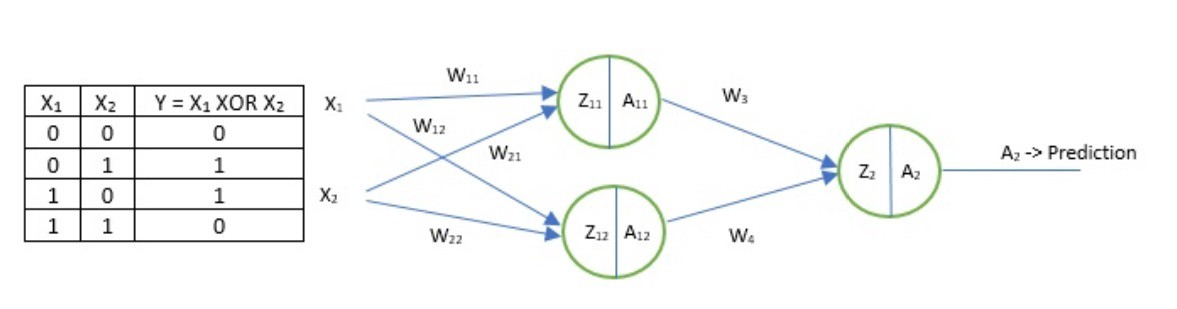

Fonte: https://medium.com/analytics-vidhya/coding-a-neural-network-for-xor-logic-classifier-from-scratch-b90543648e8a

Primeiramente, vamos criar o modelo que compreende a nossa rede multilayer perceptron. Como se trata de uma rede do tipo feed forward, utilizaremos o modelo [Sequential](https://keras.io/guides/sequential_model/), em que será possível ir enfileirando (ou empilhando) camadas de neurônio desde a camada de entrada até a camada de saída:


In [4]:
model = Sequential()

No Keras-Tensorflow, a camada de entrada não é diretamente declarada. Assim, vamos diretamente incluir a primeira camada intermediária. Temos algumas decisões a serem tomadas:

*   a quantidade de neurônios dessa camada intermediária
*   o tipo da função de ativação

Podemos ver na figura acima que são necessários dois neurônios na camada intermediária. Utilizaremos a tradicional **tangente hiperbólica** como função de ativação.

No Keras-Tensorflow, a classe [Dense](https://keras.io/api/layers/core_layers/dense/) implementa uma camada de neurônios totalmente conexa (fully connected). Precisamos passar como argumentos:

*   ```number_of_neurons```: a quantidade de neurônios nessa camada intermediária.
*   ```input_dim```: a dimensão do *embedding* (espaço de valores) que chegam à essa camada. Como se trata da primeira camada intermediária, a dimensão de entrada é a própria dimensionalidade (quantidade de atributos) dos dados de entrada da rede.
*   ```activation```: a função de ativação. Consulte a documentação da classe [Dense](https://keras.io/api/layers/core_layers/dense/) para outras possibilidades.


In [5]:
number_of_neurons = 2

model.add(Dense(number_of_neurons,input_dim=2, activation="tanh"))

Por fim, temos que modelar a camada de saída. Como o problema XOR consiste em instâncias das classes "0" ou "1", temos um problema de classificação binária. Para isso, basta termos um único neurônio na camada de saída.

Assim, para incluir a camada de saída, utilizamos novamente uma camada do tipo Dense, mas agora a função de ativação é a sigmoide. Não se preocupe com as conexões entre as camadas do Keras... o próprio Keras se encarrega de conectar todas as camadas Dense (Fully Connected) entre si! 

In [6]:
model.add(Dense(1,activation="sigmoid"))

Uma visão geral de como está a arquitetura construída para essa Feed Forward Multilayer Perceptron:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Em relação à quantidade de parâmetros. Como cada neurônio possui 2 pesos, teremos no total: 

*   Cada neurônio contém $2$ pesos. Sendo $3$ neurônios, temos $6$ pesos;
*   Temos também um bias para cada neurônio. Sendo $3$ neurônios, temos mais $3$ pesos;

Isso totaliza $9$ parâmetros cujos valores serão ajustados durante o treinamento, realizado pelo algoritmo backpropagation. Lembre-se:


**Parâmetros do modelo $\neq$ Hiperparâmetros do modelo**

Agora vamos treinar nossa rede utilizando o método de otimização [Stochastic Gradient Descent](https://keras.io/api/optimizers/sgd/), uma implementação do BackPropagation que suporta os modelos do Keras-Tensorflow.

Precisamos ajustar um argumento relacionado ao hiperparâmetro da taxa de aprendizado. Colocaremos a *learning rate* igual a $0,01$:

In [8]:
sgd = SGD(learning_rate=0.01)

Agora vamos "compilar" nosso modelo de forma a prepará-lo para o processo de treinamento utilizando o método *compile*. Precisamos definir uma função *loss*, que nada mais é do que a função Erro que avalia como está a performance do modelo criado na classificação dos labels da tabela XOR. Só que agora estamos com uma Multilayer Perceptron que tem em sua camada de saída uma função sigmóide, que gera valores reais: a probabilidade da instância $\mathbf{x_i}$ processada ser da classe $1$, isto é, $P(y_i=1|\mathbf{x_i})$.

No caso, estaremos utilizando a *binary_crossentropy* (BICE) como a função erro por termos um problema de classificação binária (em duas classes: labels $0$ ou $1$):

\begin{equation}
BICE = - \sum_{i=1}^N y_i \log(p_i) + (1-y_i) \log (1-p_i)
\end{equation}

em que $y_i \in \{0,1\}$ é a classe predita pela rede, $p_i \in [0,1]$ é a estimativa de probabilidade do modelo para classificar a instância $\mathbf{x_i}$ como sendo da classe $1$ -- valor este gerado pela função sigmóide.



In [9]:
model.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])

Por fim, vamos iniciar o processo de treinamento. Aqui vamos inserir a quantidade de épocas igual a $10$ -- é outro hiperparâmetro importante!

In [10]:
history_fine = model.fit(X,labels,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.9489 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 0.9450 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.9411 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.9373 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.9335 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9297 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9260 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.9223 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.9186 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.9150 - accuracy: 0.0000e+00


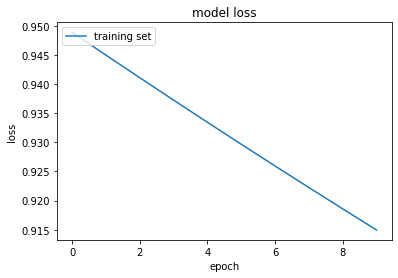

In [11]:
import matplotlib.pyplot as plt
loss = history_fine.history['loss']

plt.plot(history_fine.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

Observe que o erro da rede foi diminuindo com o passar das épocas, indicando que a rede gradativamente foi aprendendo os padrões nos dados e ganhando confiança na predição das instâncias de $X$. Entretanto, os valores da função de erro (*loss*) ainda estão altos, já que existem erros na classificação das instâncias de $X$ em relação aos $labels$. Mas veremos isso mais tarde...

Agora podemos apenas classificar as instâncias utilizando um modelo recém-treinado. Vamos criar uma instância fictícia x' (```xl```), em que ```xl = [1,0]``` e vamos prever qual é sua classe.

Para isso, utilizamos o método *predict* e passamos como argumento o conjunto de dados a ser predito. Como esse método obrigatoriamente recebe um conjunto de instâncias a serem classificadas, vamos criar uma variável associada a conjunto de dados ```XL``` que contenha apenas a instância ```xl```:

In [12]:
xl = [1,0]

XL = np.array([xl])

XL

array([[1, 0]])

e agora executamos o método *predict*:

In [13]:
y = model.predict(XL)
y

array([[0.429945]], dtype=float32)

Observe que a saída obtida se trata de uma probabilidade as saídas que obtivemos para cada instância de $X$. Agora vamos definitivamente decidir qual é a classe da instância ```xl``` de acordo com o procedimento abaixo:

In [14]:
for i in range(len(XL)):
  if y[i] >= 0.5:
    print(f"Classe: 1")
  else:
    print(f"Classe: 0")

Classe: 0


In [15]:
y_pred = np.argmax(y,axis=1)
y_pred

array([0])

repare que o resultado 

**e se alterarmos a learning rate? Como será que o modelo vai se comportar?**

Bom, vamos recomeçar todo o processo: recriamos o modelo de classificação e realizamos o treinamento mas com um valor de taxa de aprendizado maior:

In [16]:
model = Sequential()
model.add(Dense(number_of_neurons,input_dim=2, activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
sgd = SGD(learning_rate=0.5)
model.compile(loss="binary_crossentropy",optimizer=sgd,metrics=['accuracy'])
history_fine = model.fit(X,labels,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 734ms/step - loss: 0.6705 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6099 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 0.5652 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 22ms/step - loss: 0.5314 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 0.5051 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.4839 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 22ms/step - loss: 0.4660 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 31ms/step - loss: 0.4502 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4355 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 22ms/step - loss: 0.4215 - accuracy: 0.7500


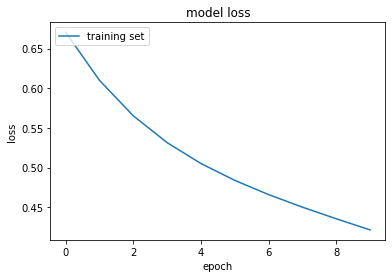

In [17]:
import matplotlib.pyplot as plt
loss = history_fine.history['loss']

plt.plot(history_fine.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set'], loc='upper left')
plt.show()

Hummmm... o modelo está um pouco melhor (mais confiante) após apenas ajustarmos o valor da taxa de aprendizado. Exercício: otimize os hiperparâmetros desse modelo para melhorar ainda mais esse modelo, fazendo-o acertar todas as predições durante o treinamento nas últimas épocas.

### Salvando os pesos do seu modelo

In [18]:
import h5py
model_structure = model.to_json()

with open("arquitetura_1_mlp.json",'w') as json_file:
  json_file.write(model_structure)

model.save_weights("pesos_1_modelo.json")